# **Data Visualization**

In [2]:
#Loading the Taxis Dataset

import seaborn as sns
df = sns.load_dataset("taxis")
df

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


In [4]:
df.head()
df.columns


Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')

In [8]:
#2. Handling Missing Values

df.isnull().sum()

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [10]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

In [11]:
#Impute Missing Values

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

/tmp/ipython-input-3372508959.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-3372508959.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [12]:
#Remove Rows with Missing Values in Critical Columns


df.dropna(subset=['pickup_zone', 'dropoff_zone'], inplace=True)


In [13]:

df.isnull().sum()


,0
pickup,0
dropoff,0
passengers,0
distance,0
fare,0
tip,0
tolls,0
total,0
color,0
payment,0


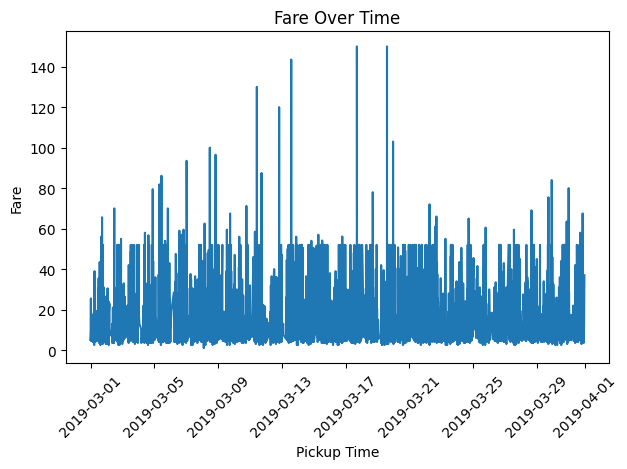

In [17]:
#Visualizations using Matplotlib/Pandas Plot:
#line chart

import pandas as pd

df['pickup'] = pd.to_datetime(df['pickup'])
df = df.sort_values('pickup')

import matplotlib.pyplot as plt

plt.figure()
plt.plot(df['pickup'], df['fare'])
plt.xlabel('Pickup Time')
plt.ylabel('Fare')
plt.title('Fare Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





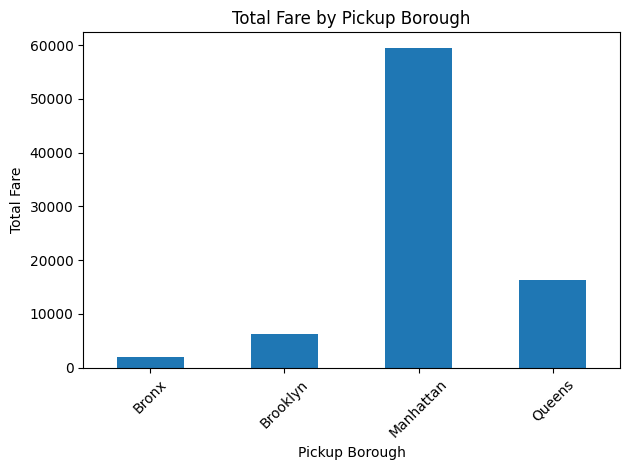

In [19]:
#bar chart

borough_fare = df.groupby('pickup_borough')['fare'].sum()

plt.figure()
borough_fare.plot(kind='bar')
plt.xlabel('Pickup Borough')
plt.ylabel('Total Fare')
plt.title('Total Fare by Pickup Borough')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

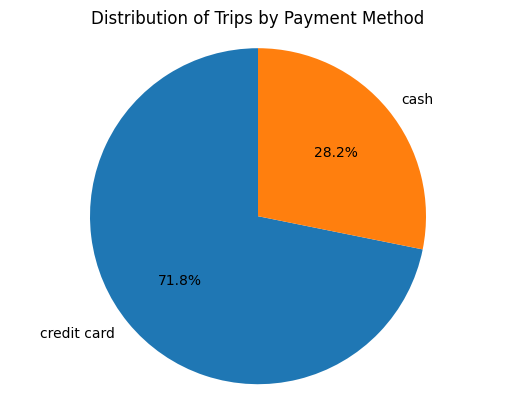

In [20]:
#pie chart

payment_counts = df['payment'].value_counts()

plt.figure()
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Trips by Payment Method')
plt.axis('equal')  # Makes the pie chart circular
plt.show()



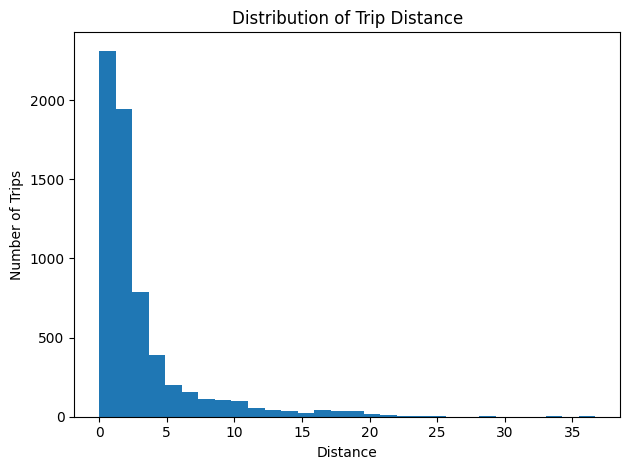

In [21]:
#histogram

plt.figure()
plt.hist(df['distance'], bins=30)
plt.xlabel('Distance')
plt.ylabel('Number of Trips')
plt.title('Distribution of Trip Distance')
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

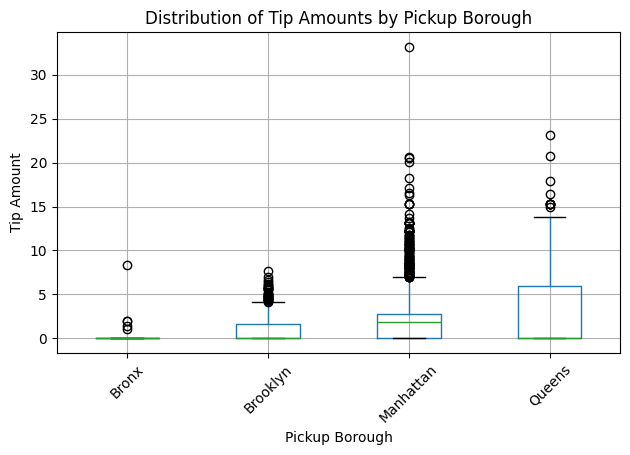

In [22]:
#box plot

plt.figure()
df.boxplot(column='tip', by='pickup_borough')
plt.xlabel('Pickup Borough')
plt.ylabel('Tip Amount')
plt.title('Distribution of Tip Amounts by Pickup Borough')
plt.suptitle('')  # Removes automatic pandas subtitle
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Visualizations using Seaborn:**

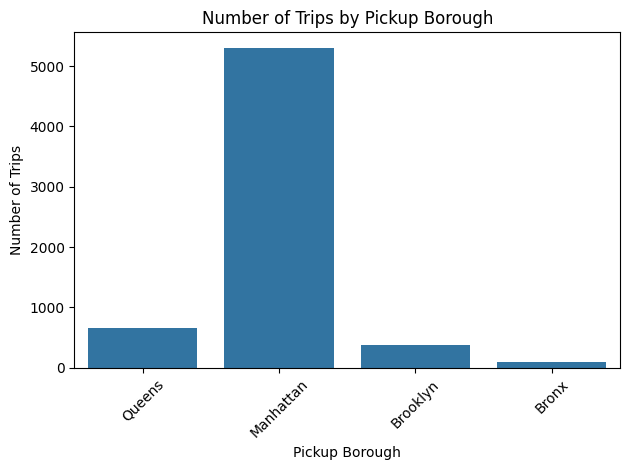

In [23]:
#count plot

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.countplot(data=df, x='pickup_borough')
plt.xlabel('Pickup Borough')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by Pickup Borough')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


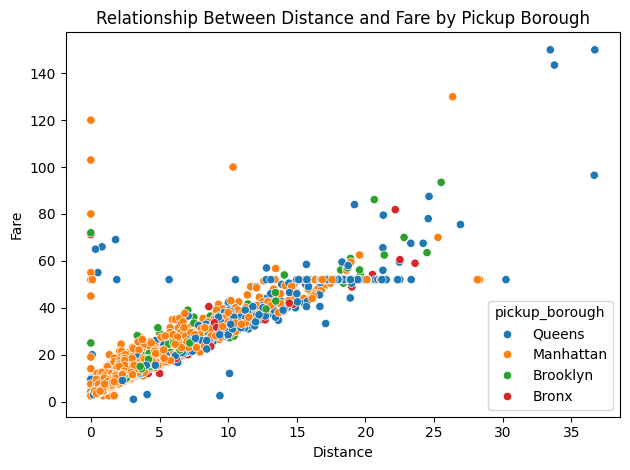

In [24]:
#scatter plot

plt.figure()
sns.scatterplot(
    data=df,
    x='distance',
    y='fare',
    hue='pickup_borough'
)
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.title('Relationship Between Distance and Fare by Pickup Borough')
plt.tight_layout()
plt.show()


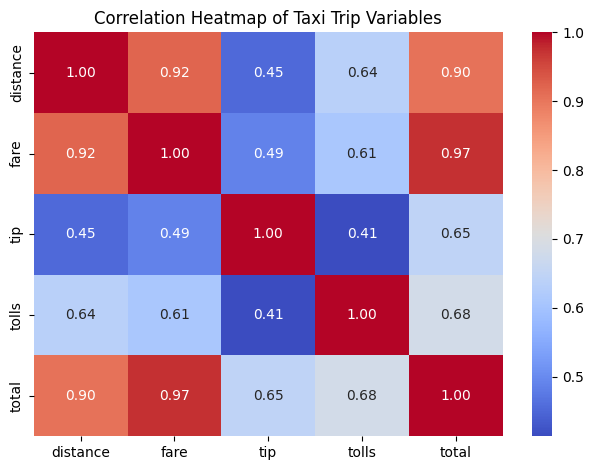

In [28]:
#heat map

num_df = df[['distance', 'fare', 'tip', 'tolls', 'total']]
corr_matrix = num_df.corr()

plt.figure()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Taxi Trip Variables')
plt.tight_layout()
plt.show()

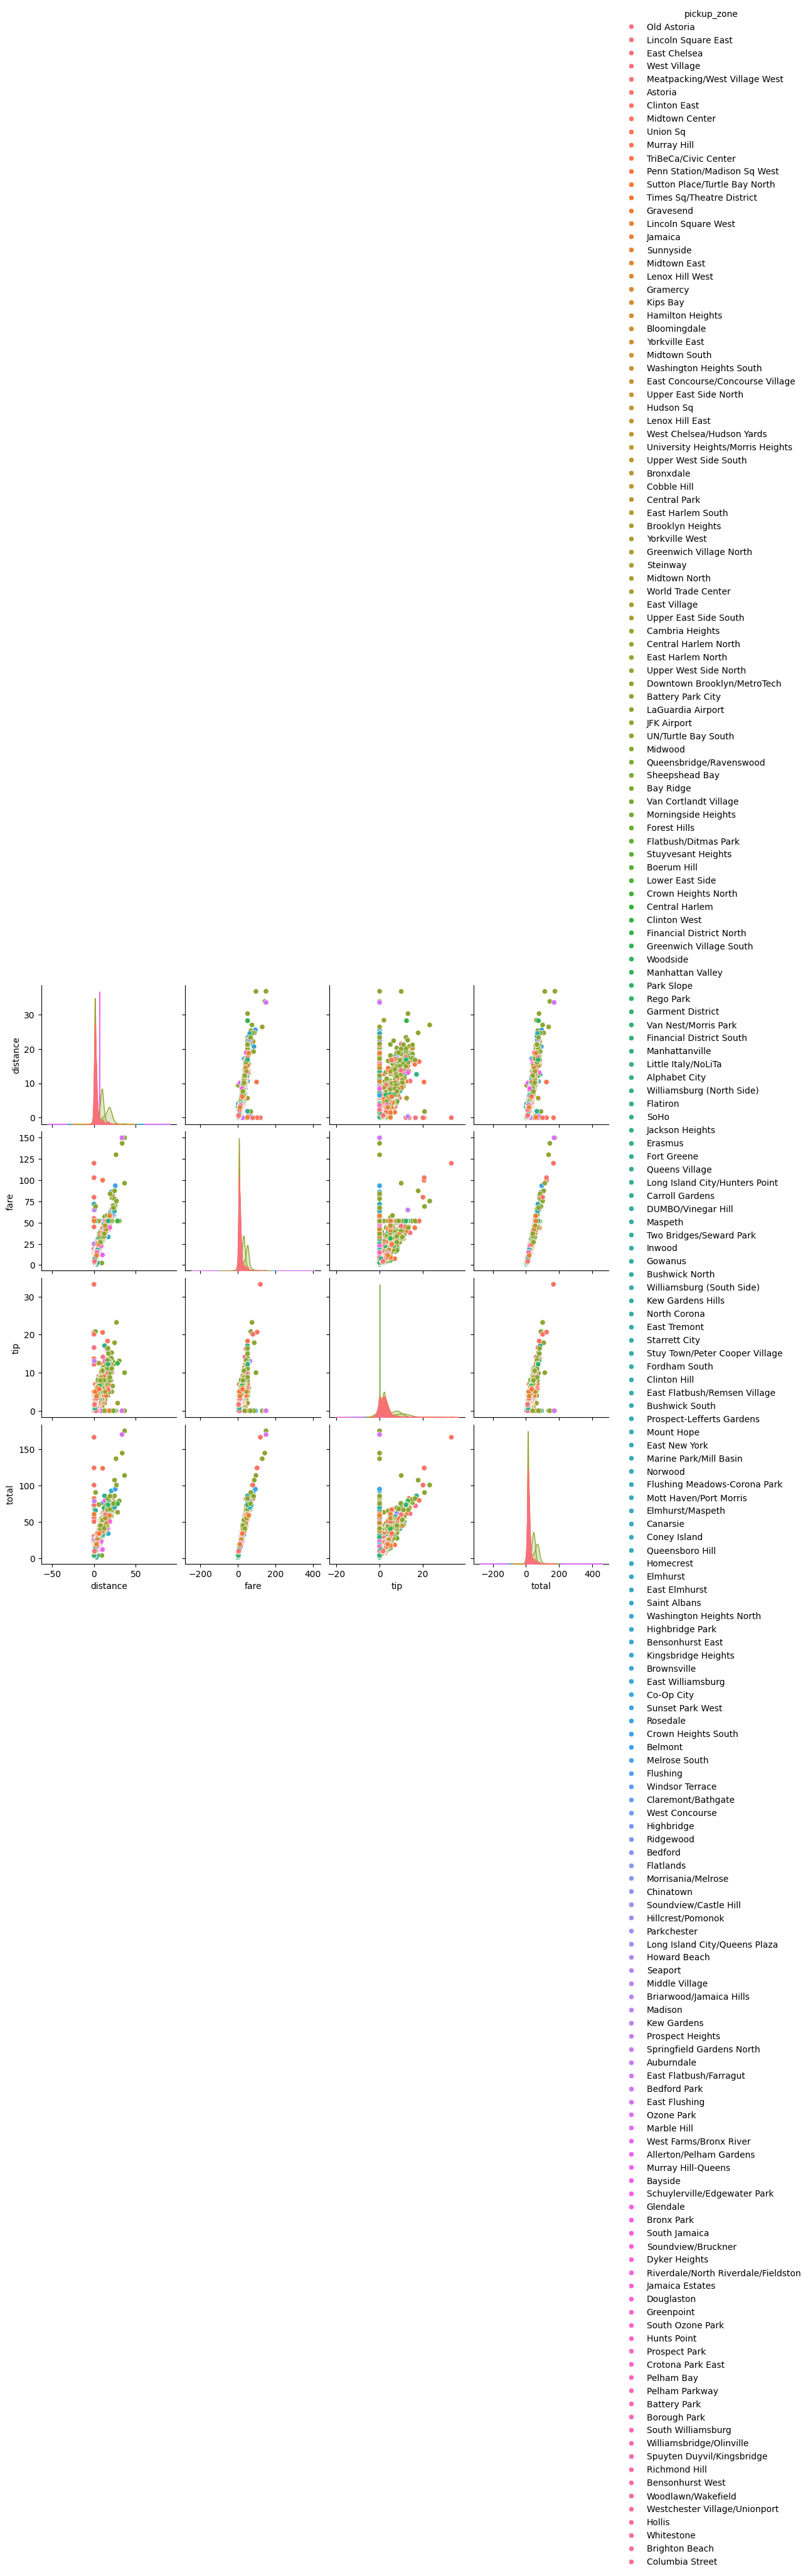

In [30]:
#pair plot

pair_df = df[['distance', 'fare', 'tip', 'total', 'pickup_zone']]

sns.pairplot(
    data=pair_df,
    vars=['distance', 'fare', 'tip', 'total'],
    hue='pickup_zone'
)
plt.show()

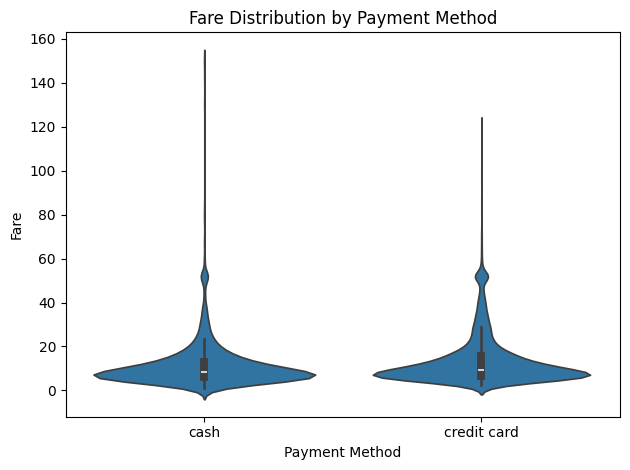

In [31]:
#Violin Plot

plt.figure()
sns.violinplot(
    data=df,
    x='payment',
    y='fare'
)
plt.xlabel('Payment Method')
plt.ylabel('Fare')
plt.title('Fare Distribution by Payment Method')
plt.tight_layout()
plt.show()
